**Table of Contents**

- [Description](#description)
- [Importing Necessary Libraries](#importing-necessary-libraries)
- [Loading the Data](#loading-the-data)
- [Data Wrangling/Preprocessing and EDA](#data-wrangling-preprocessing)
- [Modelling and Evaluation](#modelling-and-evaluation)
- [Conclusion](#conclusion)

## <a name="description">Description</a>

- **Description**: The Human Activity Recognition (HAR) database was developed using recordings from 30 participants performing daily activities while carrying a waist-mounted smartphone with embedded inertial sensors. The aim is to classify these activities into one of six categories.

- **Experiment Details/ Methodology**: A group of 30 volunteers, aged 19-48, performed six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) while wearing a waist-mounted Samsung Galaxy S II smartphone. The accelerometer and gyroscope captured 3-axial linear acceleration and angular velocity at 50Hz. The data, manually labeled through video recordings, was split into training (70%) and test (30%) sets. Sensor signals were pre-processed with noise filters and sampled in 2.56-second windows with 50% overlap (128 readings/window). A Butterworth low-pass filter separated body acceleration from gravity. Features were extracted from each window using time and frequency domain variables.



## <a name="importing-necessary-libraries">Importing Necessary Libraries</a>

In [2]:
# Standard ones
import numpy as np
import pandas as pd

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# For modelling
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# For evaluation
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.9 MB/s eta 0:00:00


## <a name="loading-the-data">Loading the Data</a>

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/MachineLearningandDataScienceGfG/Smartphone_Classification_Project/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/MachineLearningandDataScienceGfG/Smartphone_Classification_Project/test.csv')

In [4]:
# Checking the length of the datasets
train_df.shape, test_df.shape

((7352, 563), (999, 563))

In [5]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [7]:
# Checking the subject's data instances
train_df['subject'].value_counts()

subject
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64

## <a name="data-wrangling-preprocessing">Data Wrangling/Preprocessing & EDA</a>

In [8]:
# Checking for the duplicates in the data
sum(train_df.duplicated()), sum(test_df.duplicated())

(0, 0)

0 instances are dupliacted in the data.

In [9]:
# Checking out the null values
print(f'There are {train_df.isnull().values.sum()} null values in the training set.')
print(f'There are {test_df.isnull().values.sum()} null values in the test set.')

There are 0 null values in the training set.
There are 0 null values in the test set.


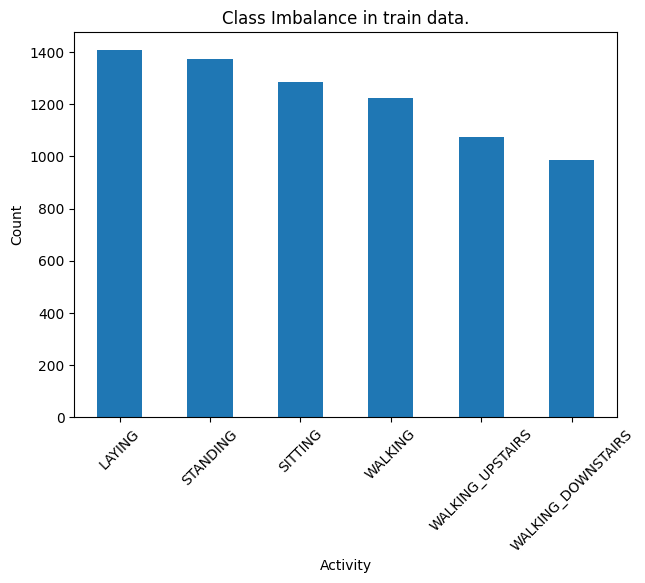

In [10]:
# Checking for class imbalances
plt.figure(figsize=(7,5))
train_df['Activity'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Class Imbalance in train data.')
plt.xticks(rotation=45)
plt.show();

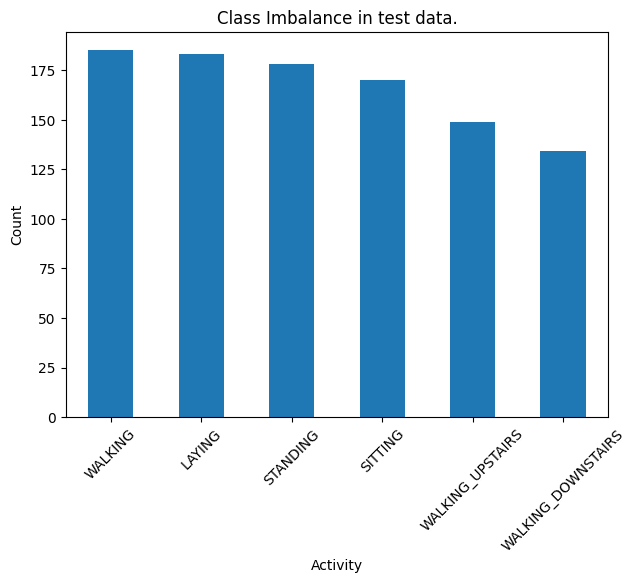

In [11]:
plt.figure(figsize=(7,5))
test_df['Activity'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Class Imbalance in test data.')
plt.xticks(rotation=45)
plt.show();

We can infer that the class imbalance is not significant.

The data is very high dimensional. We can see from the column count whilst we read the data, there are around 563 columns. Performing an EDA over all over them individually is not feasible.

In [12]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


We observe that there are many statistical descriptions for every feature such as that of mean, standard deviation, min, max, etc. This might have contributed to the high dimensionality of the data.

### Extraction of the main features

In [13]:
from collections import Counter

In [14]:
df_clean_features = pd.DataFrame(Counter([col.split('-')[0].split('(')[0] for col in train_df.columns]), index = [0]).T

Now, we see the count of the excess statistical features which are contributing to the main attributes.

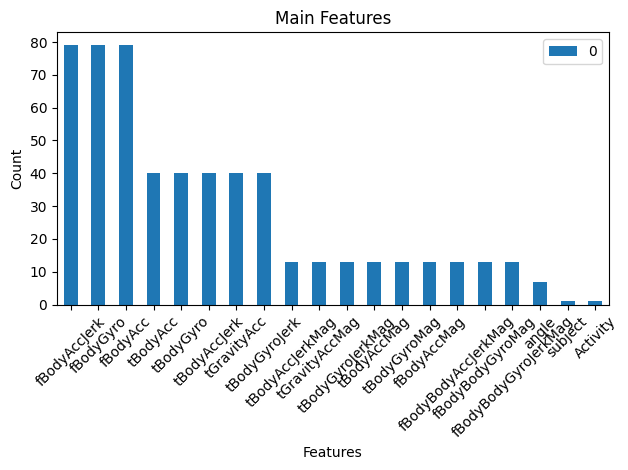

In [15]:
df_clean_features.sort_values(by=0, ascending=False).plot(kind = 'bar')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Main Features')
plt.xticks(rotation=45)
plt.tight_layout();
plt.show();

In [16]:
df_clean_features.rename(columns={0:'Count'}, inplace=True)

In [17]:
df_clean_features

,Count
tBodyAcc,40
tGravityAcc,40
tBodyAccJerk,40
tBodyGyro,40
tBodyGyroJerk,40
tBodyAccMag,13
tGravityAccMag,13
tBodyAccJerkMag,13
tBodyGyroMag,13
tBodyGyroJerkMag,13


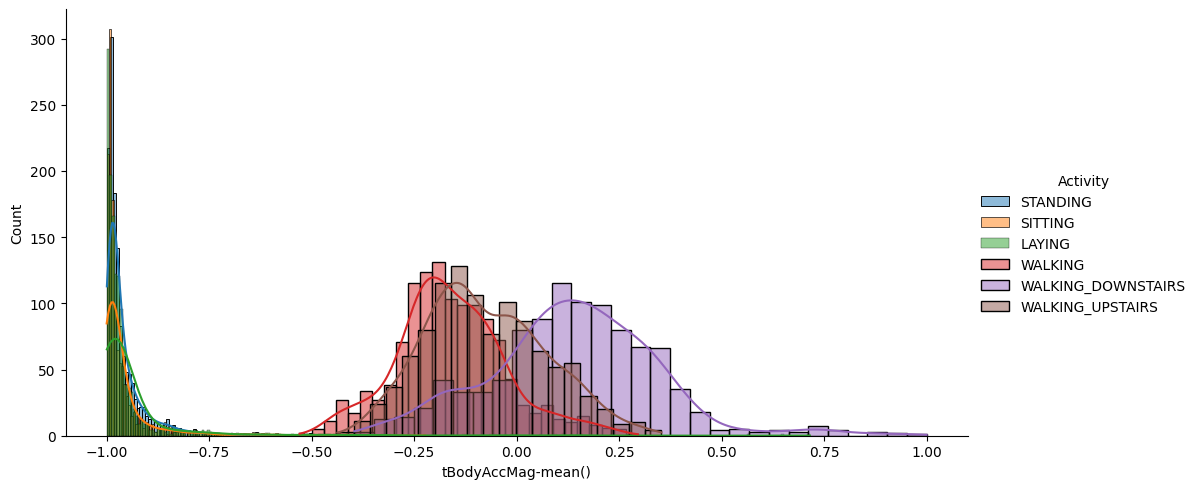

In [18]:
facetgrid = sns.FacetGrid(train_df, hue = 'Activity', height = 5, aspect = 2)
facetgrid.map(sns.histplot, 'tBodyAccMag-mean()', alpha = 0.5, kde = True)
facetgrid.add_legend();

We see that this parameter is a strong indicator of the activity, as the activities to the left are that of static type, and the right ones are of dynamic type.

### Creating box plots for this feature

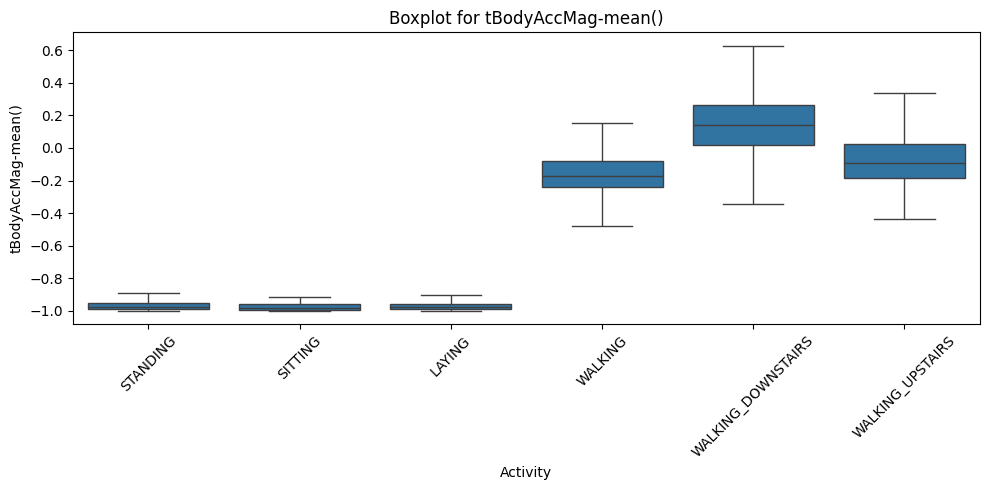

In [19]:
plt.figure(figsize=(10,5))
plt.title('Boxplot for tBodyAccMag-mean()')
sns.boxplot(x='Activity', y='tBodyAccMag-mean()', data=train_df, showfliers = False);
plt.xticks(rotation=45);
plt.tight_layout();
plt.show();

Understanding the angular relationships along the x-axis.

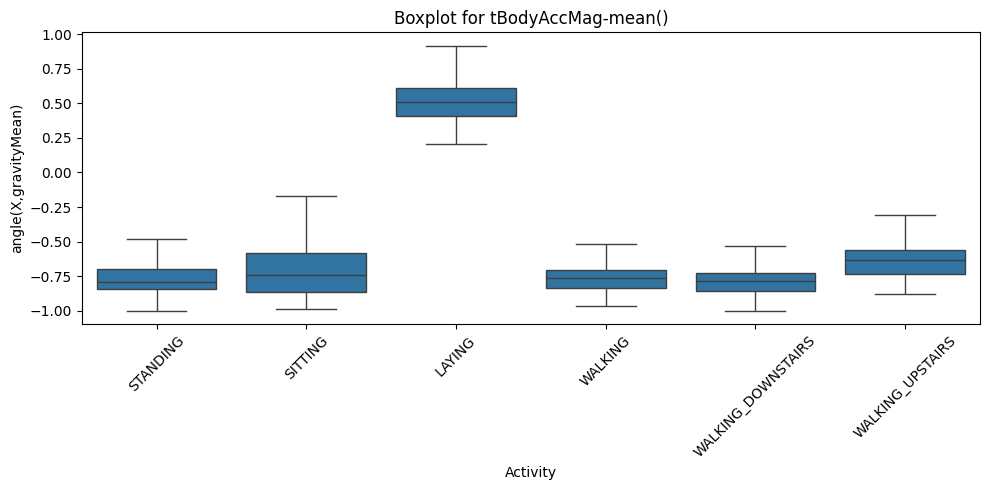

In [20]:
plt.figure(figsize=(10,5))
plt.title('Boxplot for tBodyAccMag-mean()')
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train_df, showfliers = False);
plt.xticks(rotation=45);
plt.tight_layout();
plt.show();

Understanding the angular relationships along the y-axis.

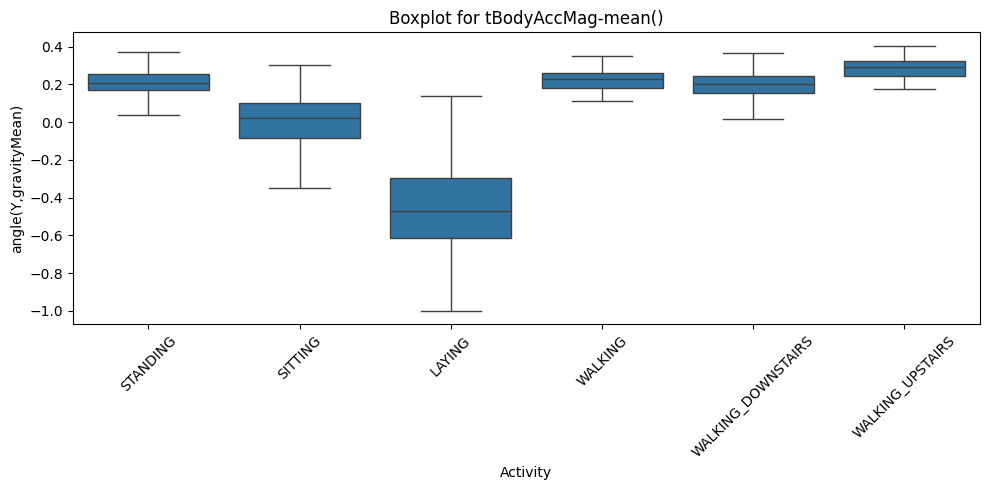

In [21]:
plt.figure(figsize=(10,5))
plt.title('Boxplot for tBodyAccMag-mean()')
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data=train_df, showfliers = False);
plt.xticks(rotation=45);
plt.tight_layout();
plt.show();

### Using Dimnesionality reduction techniques for data visualisation

In [22]:
X_train = train_df.drop(['subject', 'Activity'], axis=1)
y_train = train_df['Activity']

X_test = test_df.drop(['subject', 'Activity'], axis=1)
y_test = test_df['Activity']

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (999, 561), (999,))

In [24]:
pca = PCA(n_components = 2, random_state = 42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Visualising the reduced data

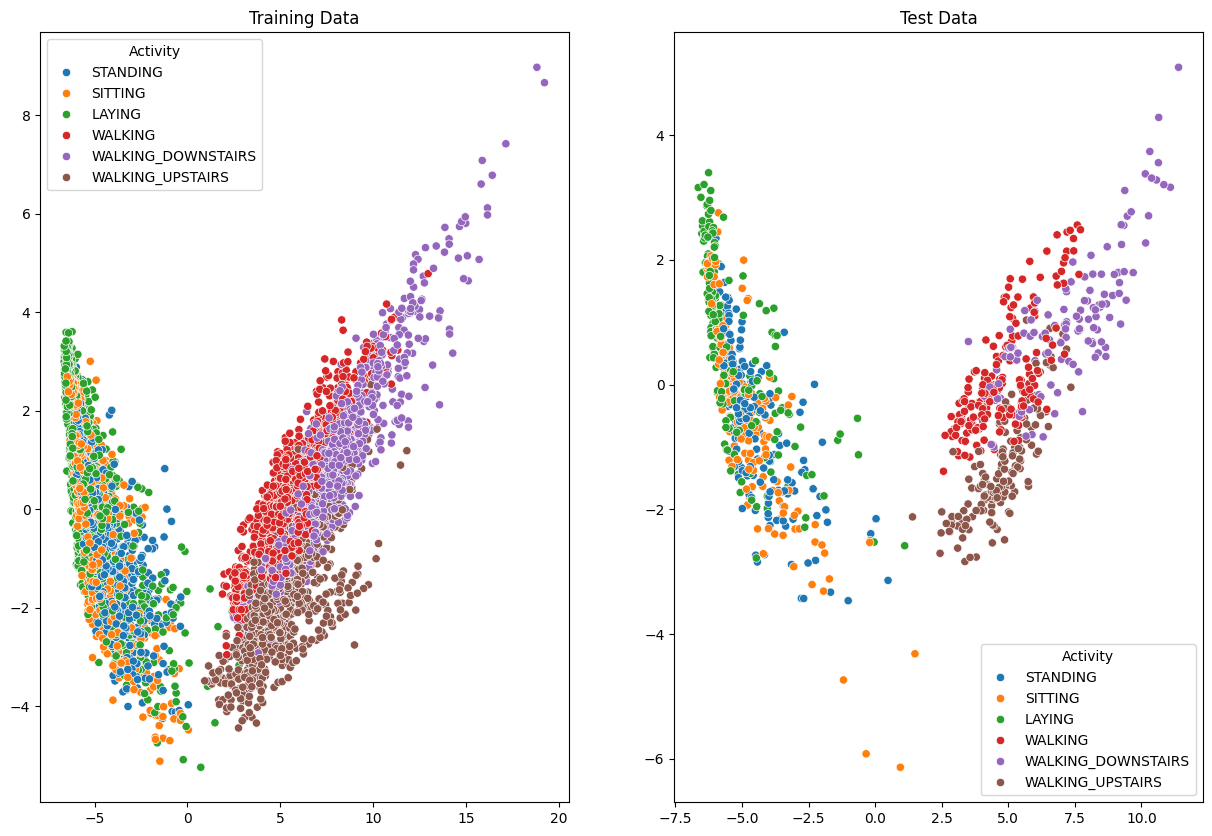

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Training Data')
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train);

plt.subplot(1,2,2)
plt.title('Test Data')
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1], hue=y_test);

Now, we can infer that there is a distinct difference between the dynamic activites and the static activites as demonstrated by the above plots. For eg. static activites such as standing, sitting, laying have a lot more in common.

### Visualisation using TSNE

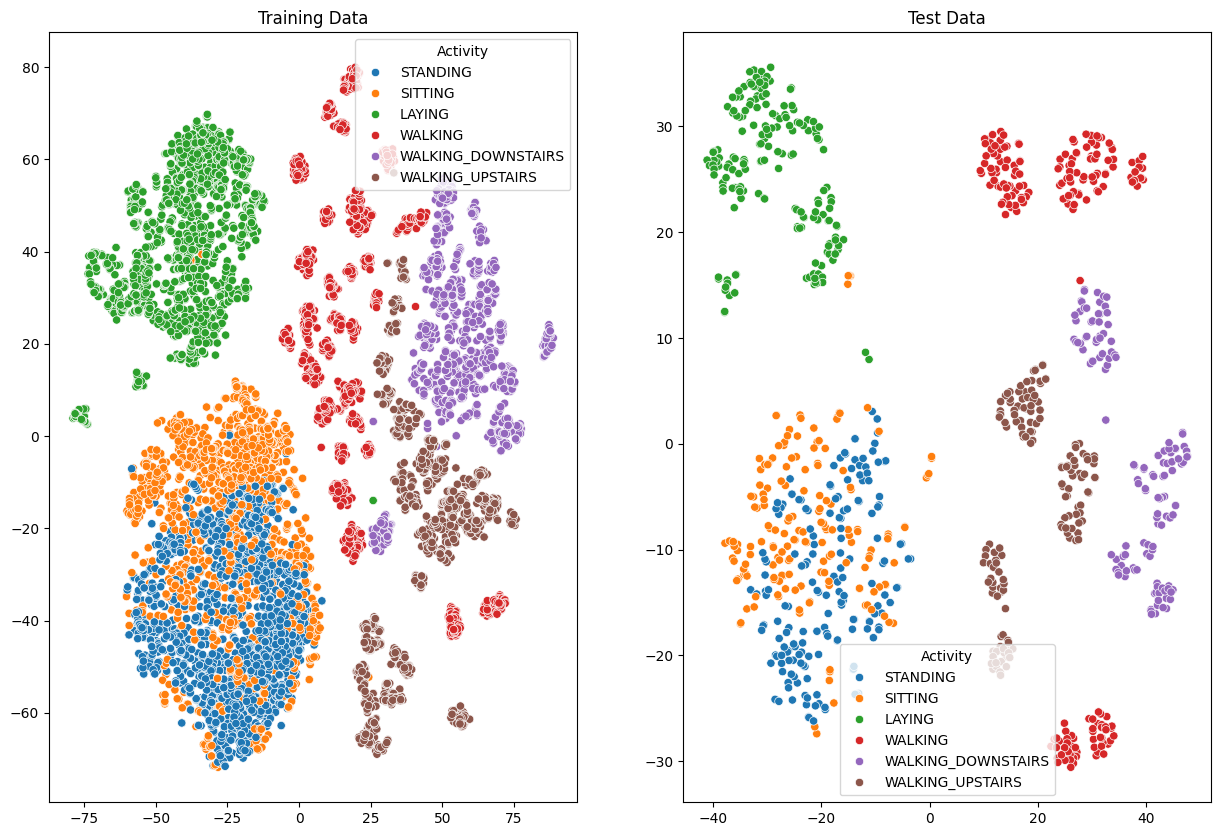

In [26]:
X_train = train_df.drop(['subject', 'Activity'], axis=1)
y_train = train_df['Activity']

X_test = test_df.drop(['subject', 'Activity'], axis=1)
y_test = test_df['Activity']

tsne = TSNE(n_components = 2, random_state = 42, n_iter = 1000)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Training Data')
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=y_train);

plt.subplot(1,2,2)
plt.title('Test Data')
sns.scatterplot(x=X_test_tsne[:,0], y=X_test_tsne[:,1], hue=y_test);

We observe that in contrast to PCA, TSNE has clustered the data in a more meaningful way, and a concise fashion thus we can use TSNE's data for the distinctness. It might mean that in the context of this study TSNE preserves more information.

## <a name="modelling-and-evaluation">Modelling and Evaluation</a>

In [27]:
X_train_tsne.shape, y_train.shape, X_test_tsne.shape, y_test.shape

((7352, 2), (7352,), (999, 2), (999,))

In [28]:
accuracy = {}

### The Logistic Regression Model

In [29]:
lr = LogisticRegression()
lr_gs = GridSearchCV(lr, {'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter':[100,200,300]}, cv = 5, n_jobs = -1)
lr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 200, 300]})

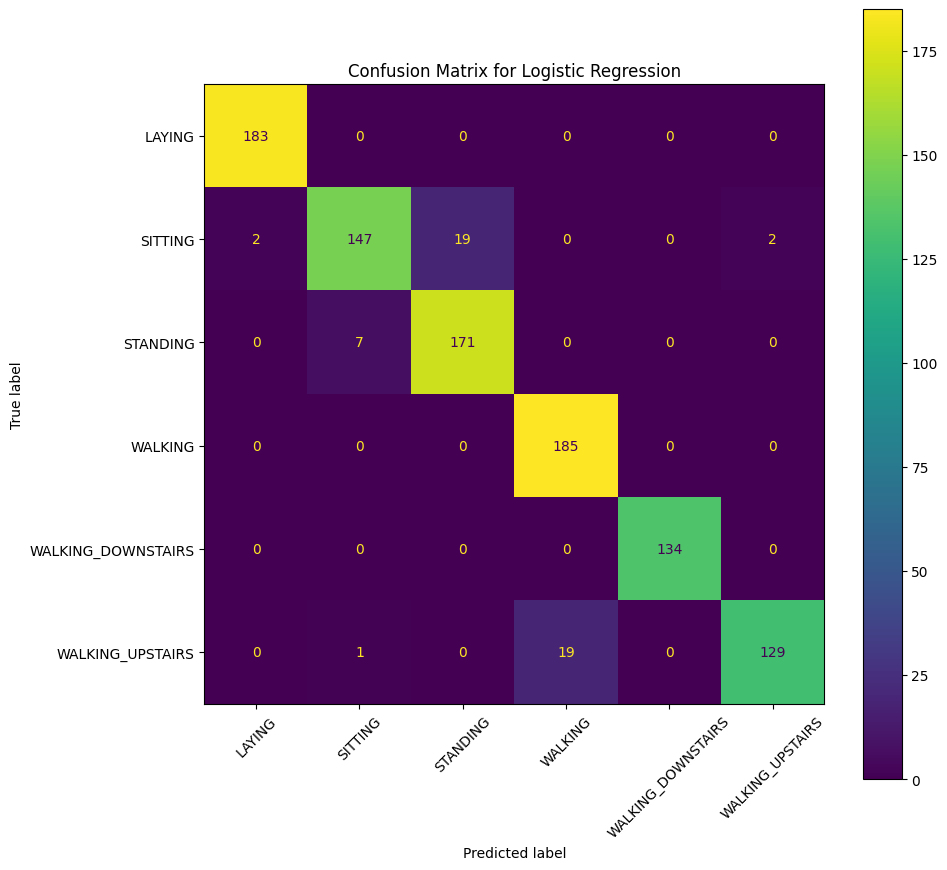

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(lr_gs, X_test, y_test, ax =ax)
ax.set_title('Confusion Matrix for Logistic Regression')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

In [31]:
lr_gs.best_params_

{'C': 10, 'max_iter': 200}

In [32]:
print(classification_report(y_test, lr_gs.predict(X_test)))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99       183
           SITTING       0.95      0.86      0.90       170
          STANDING       0.90      0.96      0.93       178
           WALKING       0.91      1.00      0.95       185
WALKING_DOWNSTAIRS       1.00      1.00      1.00       134
  WALKING_UPSTAIRS       0.98      0.87      0.92       149

          accuracy                           0.95       999
         macro avg       0.95      0.95      0.95       999
      weighted avg       0.95      0.95      0.95       999



In [33]:
accuracy['Logistic Regression'] = accuracy_score(y_test, lr_gs.predict(X_test))

### Random Forest Classifier

In [34]:
rfc_param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

rfc = RandomForestClassifier()
rfc_gs = GridSearchCV(rfc, rfc_param_grid, cv = 5, n_jobs = -1)
rfc_gs.fit(X_train, y_train)

print(classification_report(y_test, rfc_gs.predict(X_test)))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       183
           SITTING       0.84      0.81      0.82       170
          STANDING       0.83      0.85      0.84       178
           WALKING       0.91      1.00      0.95       185
WALKING_DOWNSTAIRS       1.00      0.95      0.97       134
  WALKING_UPSTAIRS       0.99      0.92      0.95       149

          accuracy                           0.92       999
         macro avg       0.93      0.92      0.92       999
      weighted avg       0.92      0.92      0.92       999



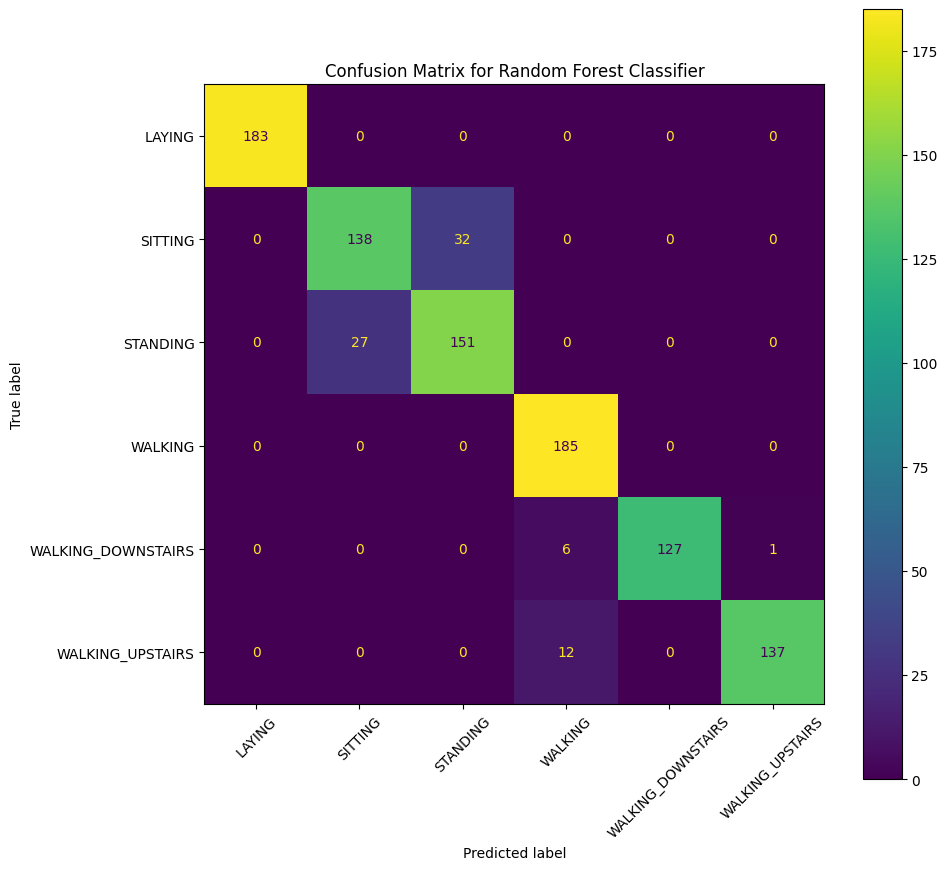

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(rfc_gs, X_test, y_test, ax =ax)
ax.set_title('Confusion Matrix for Random Forest Classifier')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

In [36]:
accuracy['Random Forest Classifier'] = accuracy_score(y_test, rfc_gs.predict(X_test))

### Support Vector Classifier

In [37]:
svc_param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Specifies the kernel type to be used in the algorithm
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}

svc = SVC()
svc_gs = GridSearchCV(svc, svc_param_grid, cv = 5, n_jobs = -1)
svc_gs.fit(X_train, y_train)

print(classification_report(y_test, svc_gs.predict(X_test)))

accuracy['Support Vector Classifier'] = accuracy_score(y_test, svc_gs.predict(X_test))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       183
           SITTING       0.94      0.86      0.90       170
          STANDING       0.89      0.95      0.92       178
           WALKING       0.96      1.00      0.98       185
WALKING_DOWNSTAIRS       0.99      1.00      1.00       134
  WALKING_UPSTAIRS       0.99      0.95      0.97       149

          accuracy                           0.96       999
         macro avg       0.96      0.96      0.96       999
      weighted avg       0.96      0.96      0.96       999



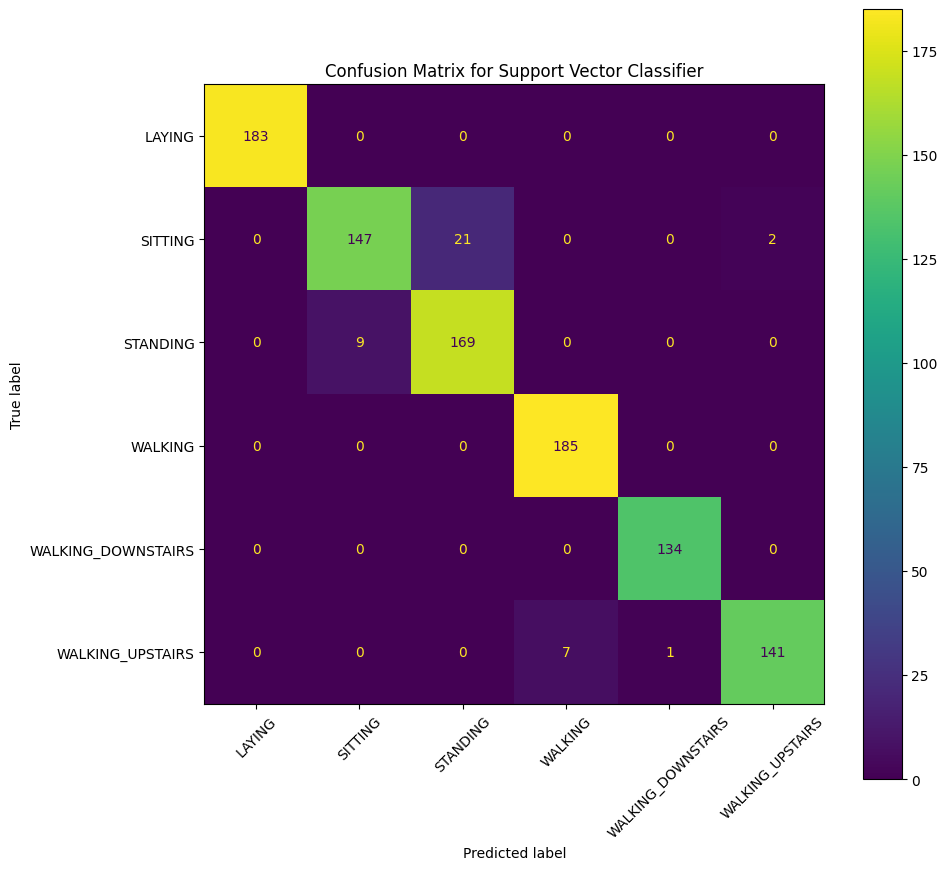

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(svc_gs, X_test, y_test, ax =ax)
ax.set_title('Confusion Matrix for Support Vector Classifier')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

### Cat Boost Classifier

In [41]:
catboost_model = CatBoostClassifier(task_type='GPU', devices='0')
param_grid = {
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(classification_report(y_test, grid_search.predict(X_test)))

accuracy['Cat Boost Classifier'] = accuracy_score(y_test, grid_search.predict(X_test))

0:	learn: 1.1280526	total: 35.6ms	remaining: 35.5s
1:	learn: 0.8679264	total: 60.8ms	remaining: 30.4s
2:	learn: 0.7063163	total: 78.8ms	remaining: 26.2s
3:	learn: 0.5921064	total: 96.8ms	remaining: 24.1s
4:	learn: 0.5068597	total: 115ms	remaining: 22.9s
5:	learn: 0.4398671	total: 134ms	remaining: 22.2s
6:	learn: 0.3851806	total: 153ms	remaining: 21.7s
7:	learn: 0.3451619	total: 173ms	remaining: 21.4s
8:	learn: 0.3073359	total: 193ms	remaining: 21.3s
9:	learn: 0.2784703	total: 212ms	remaining: 21s
10:	learn: 0.2531796	total: 239ms	remaining: 21.5s
11:	learn: 0.2350204	total: 258ms	remaining: 21.3s
12:	learn: 0.2181001	total: 279ms	remaining: 21.2s
13:	learn: 0.2036564	total: 298ms	remaining: 21s
14:	learn: 0.1901358	total: 316ms	remaining: 20.8s
15:	learn: 0.1787700	total: 337ms	remaining: 20.7s
16:	learn: 0.1674071	total: 355ms	remaining: 20.5s
17:	learn: 0.1598990	total: 376ms	remaining: 20.5s
18:	learn: 0.1539248	total: 395ms	remaining: 20.4s
19:	learn: 0.1472929	total: 416ms	remaini

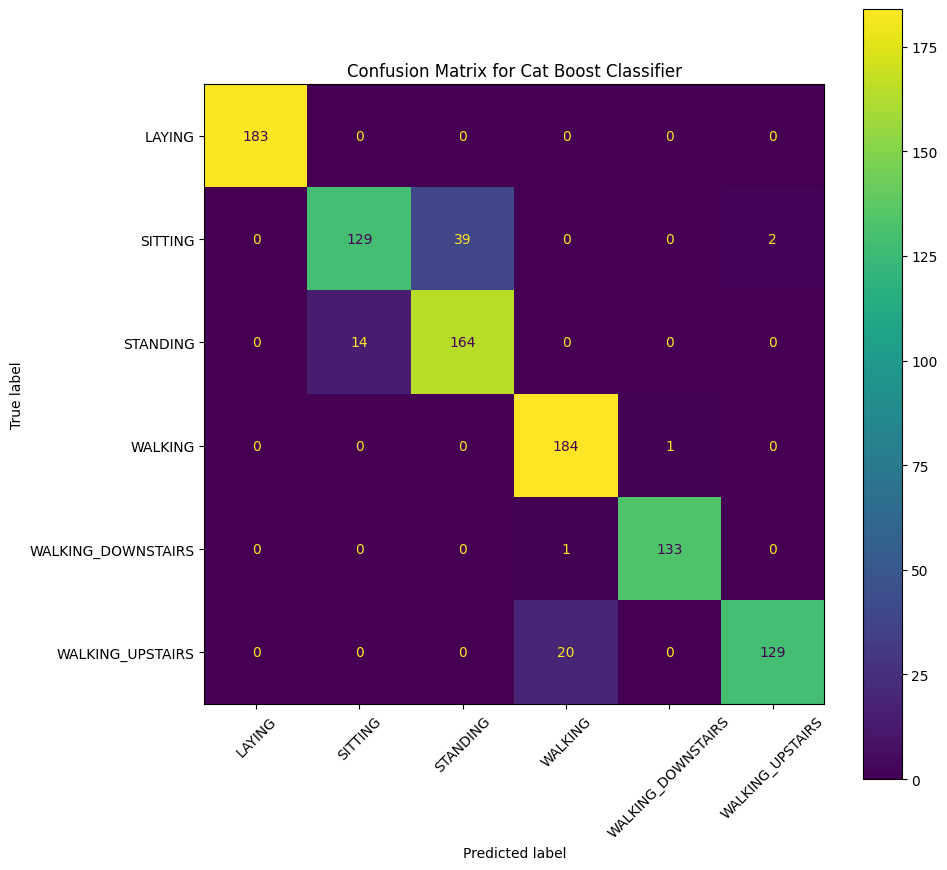

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, ax =ax)
ax.set_title('Confusion Matrix for Cat Boost Classifier')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

In [44]:
grid_search.best_params_

{'depth': 6, 'iterations': 1000, 'learning_rate': 0.2}

## <a name="conclusion">Conclusion</a>

In [48]:
df_acc = pd.DataFrame(accuracy.items(), columns=['Model', 'Accuracy'])

In [49]:
df_acc

,Model,Accuracy
0,Logistic Regression,0.949950
1,Random Forest Classifier,0.921922
2,Support Vector Classifier,0.959960
3,Cat Boost Classifier,0.922923


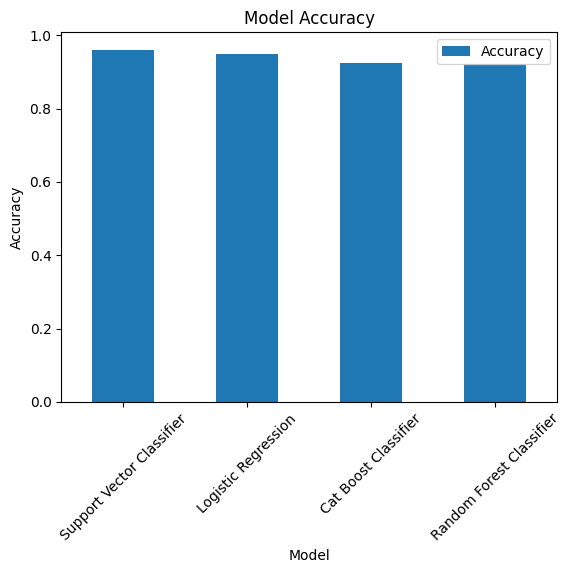

In [52]:
df_acc.sort_values(by = 'Accuracy',ascending = False).plot(kind='bar', x='Model', y='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.xticks(rotation=45)
plt.show();

We can deduce that based on the metric of accuracy, the most acurate model is Cat Boost Classifier.